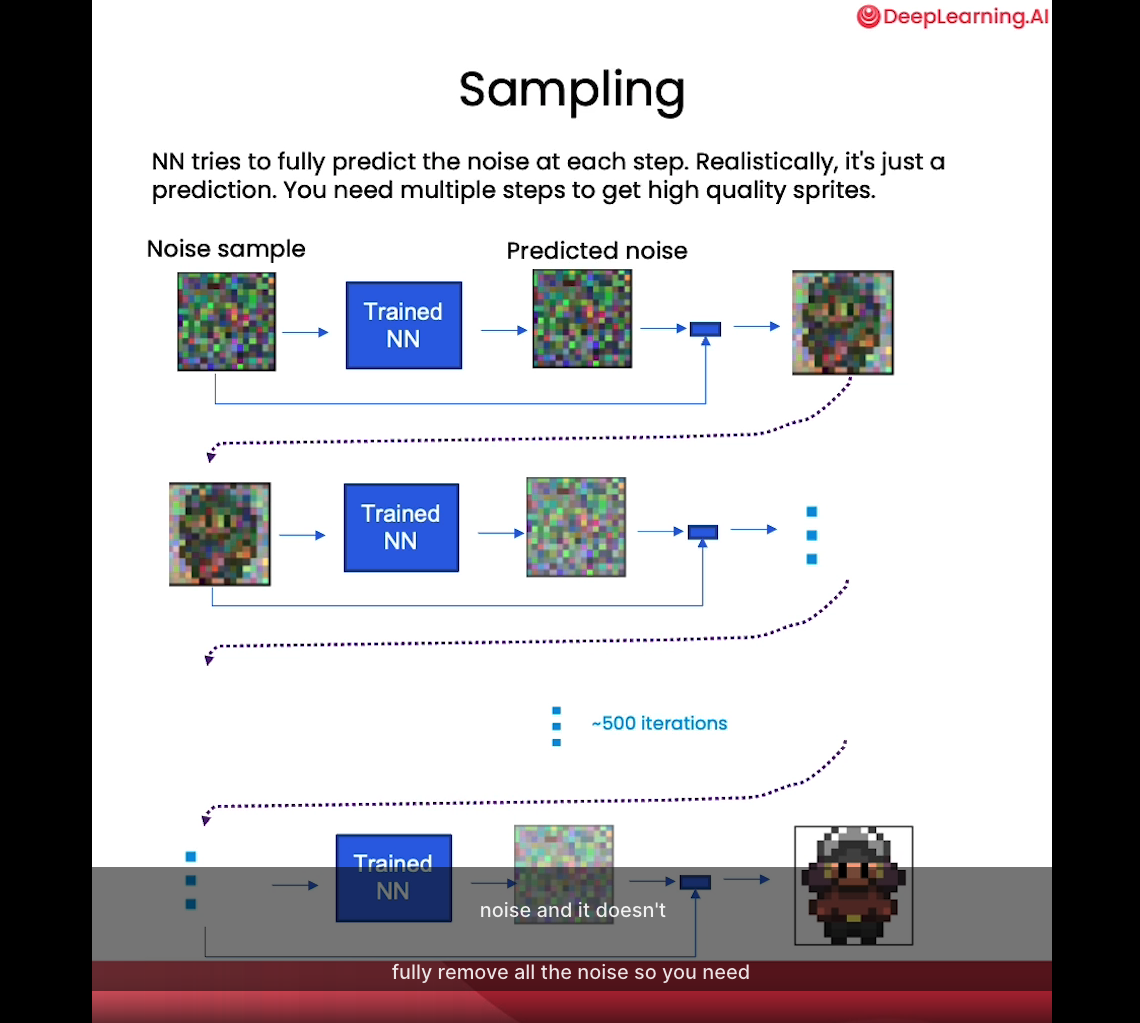

![Alt text](image-1.png)

![Alt text](image.png)

In [ ]:
# Nerual network

![Alt text](image-2.png)

![Alt text](image-6.png)

In [ ]:
# Embedding -> For text and time


![Alt text](image-3.png)

![Alt text](image-4.png)

![Alt text](image-5.png)

<!-- There are mainly three main components in latent diffusion:

An autoencoder (VAE).
A U-Net.
A text-encoder, e.g. CLIP’s Text Encoder. -->

In [ ]:
The VAE model has two parts, an encoder and a decoder. During latent diffusion training, the encoder converts a 512*512*3 image into a low dimensional latent representation of image of size say 64*64*4 for the forward diffusion process. We call these small encoded versions of images as latents. We apply more and more noise to these latents at each step of training. This encoded latent representation of images acts as the input to the U-Net model.

In [ ]:
Here, we are converting an image of shape (3, 512, 512) into a latent of shape(4, 64, 64), which requires 48 times less memory. This leads to reduced memory and compute requirements compared to pixel-space diffusion models. Thus, we are able to generate 512 × 512 images very quickly on 16GB Colab GPUs as well.

The decoder transforms the latent representation back into an image. We convert the denoised latents generated by the reverse diffusion process into images using the VAE decoder.

During inference, we only need the VAE decoder to convert the denoised image into actual images.

In [ ]:
2. UNet

The U-Net predicts denoised image representation of noisy latents. Here, noisy latents act as input to Unet and the output of UNet is noise in the latents. Using this, we are able to get actual latents by subtracting the noise from the noisy latents.

The Unet that takes in the noisy latents (x) and predicts the noise. We use a conditional model that also takes in the timestep (t) and our text embedding as guidance.

The model is essentially a UNet with an encoder(12 blocks), a middle block and a skip connected decoder(12 blocks). In these 25 blocks, 8 blocks are down sampling or upsampling convolution layer and 17 blocks are main blocks that each contain four resnet layers and two Vision Transformers(ViTs). Here the encoder compresses an image representation into a lower resolution image representation and the decoder decodes the lower resolution image representation back to the original higher resolution image representation that is supposedly less noisy.

3. The Text-encoder

The text-encoder transforms the input prompt into an embedding space that goes as input to the U-Net. This acts as guidance for noisy latents when we train Unet for its denoising process. The text encoder is usually a simple transformer-based encoder that maps a sequence of input tokens to a sequence of latent text-embeddings. Stable Diffusion does not train a new text encoder and instead uses an already trained text encoder, CLIP. The text encoder creates embeddings corresponding to the input text.

![Alt text](image-7.png)

# Cross attention is used for embedding text input

# the output of resenet is flattened and passd to Q..
# The text embedding is passed into  Q and V

![Alt text](image-8.png)